<a href="https://colab.research.google.com/github/Paul-Ndirangu/Data-Science-Projects/blob/main/healthcare_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Insurance Expenses

## Getting Started

### Requirements
* Anaconda - On Windows OS install and add to root path.
* Python 3
* VS Code (Optional)
* Necessary Libraries (numpy, pandas, matplotlib, seaborn, Scikit Learn)

### Import Libraries

In [117]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn.model_selection import KFold


In [ ]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data cleaning

In [ ]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Checking for duplicated values

data.duplicated().sum()

1

In [ ]:
# Dropping any duplicated values

data.drop_duplicates(inplace=True)

In [ ]:
# Checking if there are any duplicate values

data.duplicated().sum()

0

In [ ]:
# Checking our data

data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis


### Univariate Analysis

<ipython-input-59-2a169677cb57>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


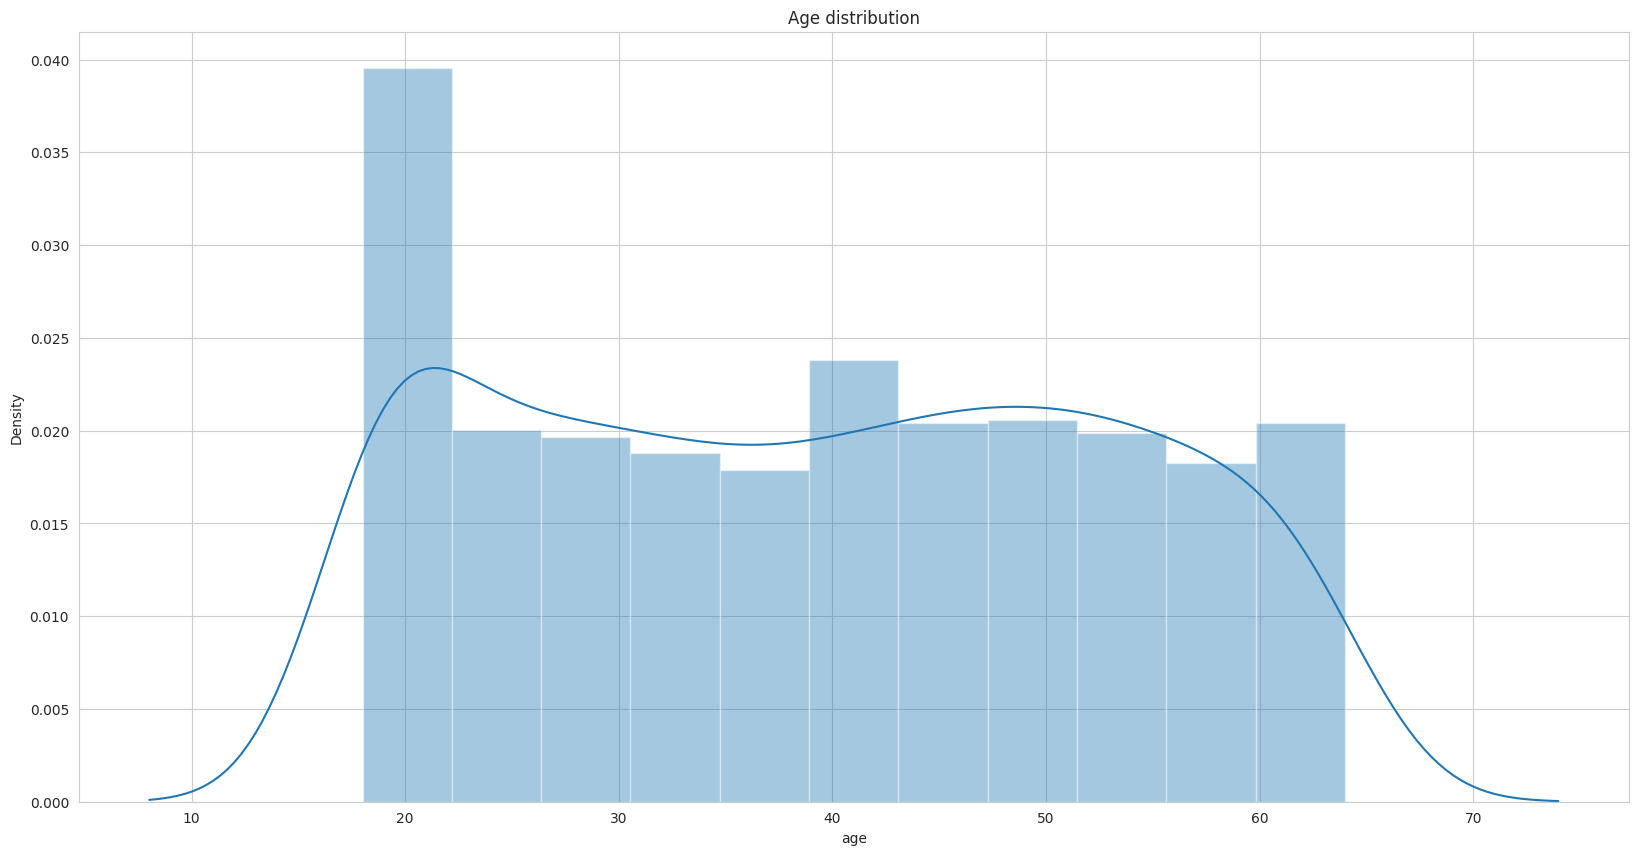

In [ ]:
# Using graphs to show the distribution of age and bmi

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.distplot(data['age'])

plt.title("Age distribution")
plt.show()


<ipython-input-60-39ae912ae95e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


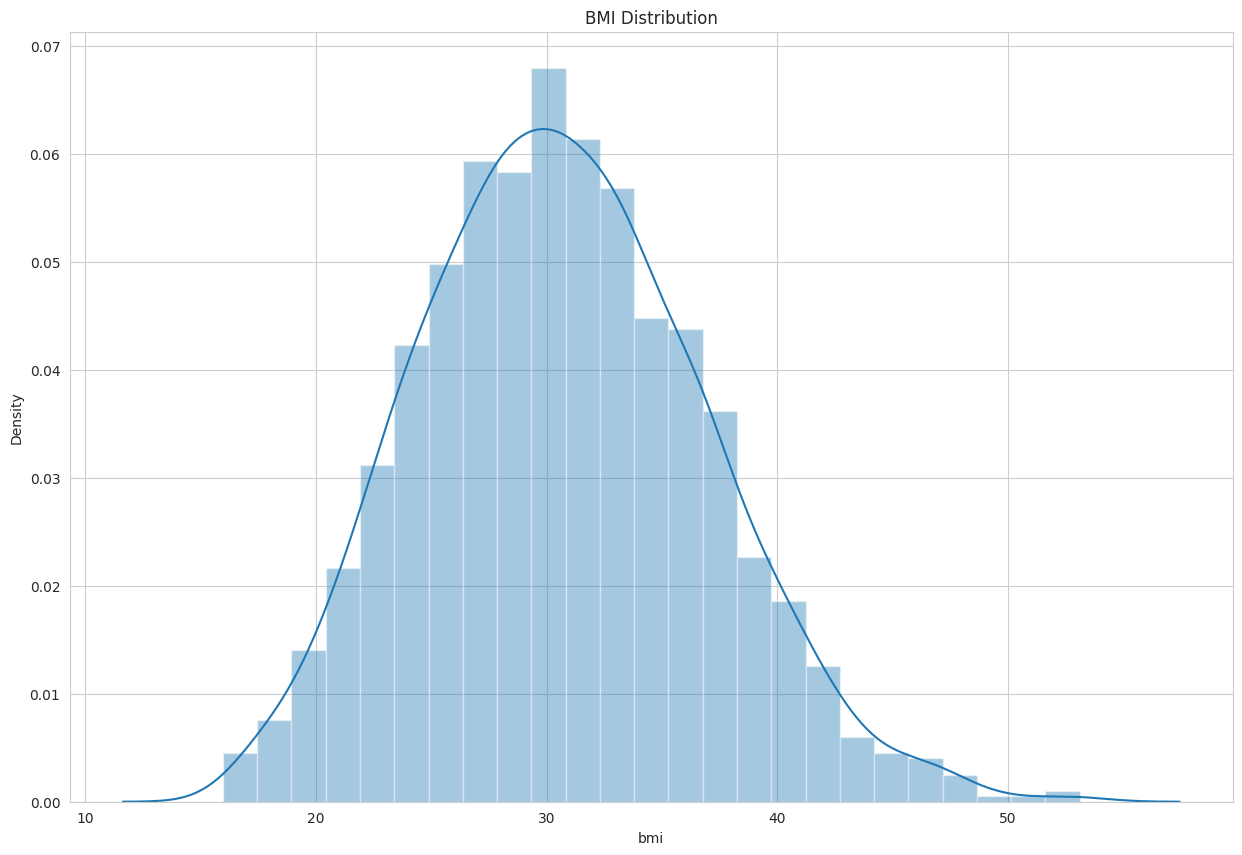

In [ ]:
# Creating a distplot for bmi

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.bmi)
plt.title('BMI Distribution')
plt.show()

<ipython-input-61-2837931d44b6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.charges)


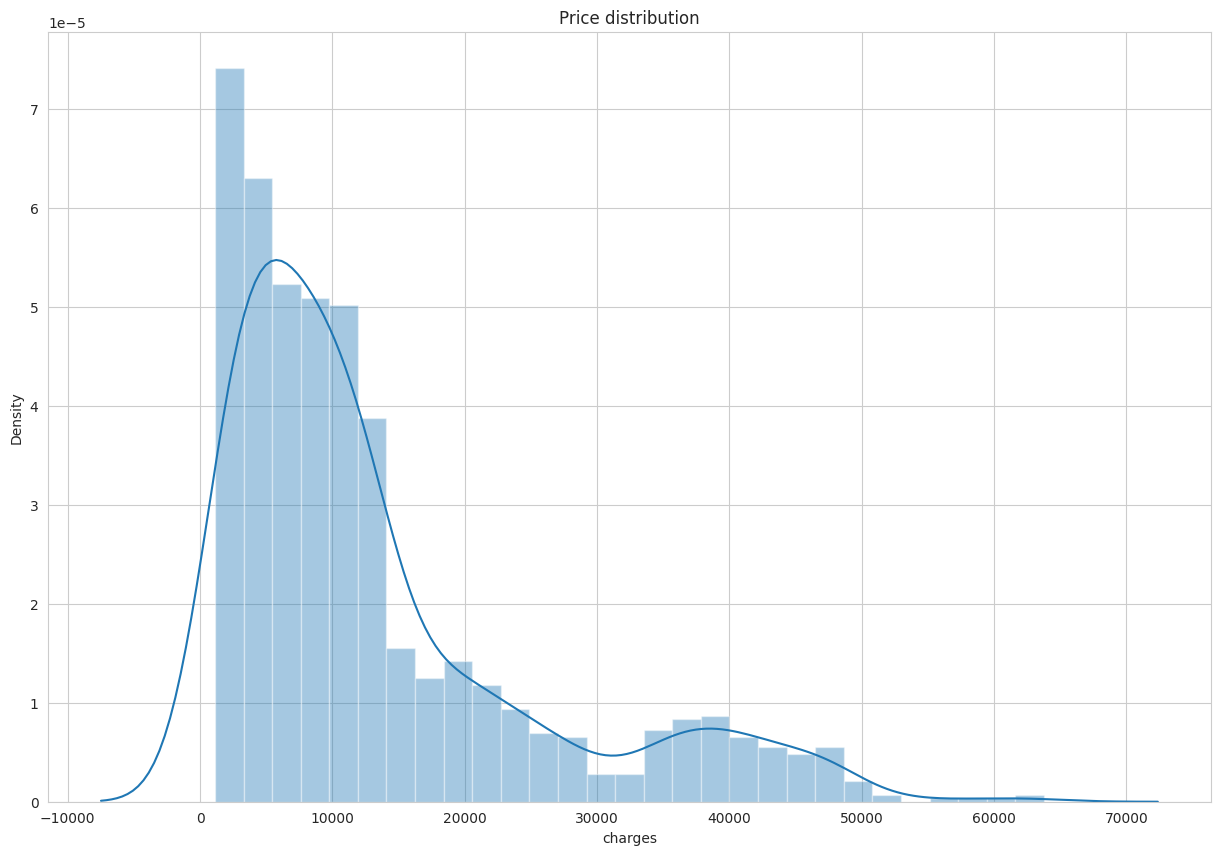

In [ ]:
# Creating a distplot to see the price distribution

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.charges)
plt.title('Price distribution')
plt.show()

<ipython-input-62-865415122fc6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.children)


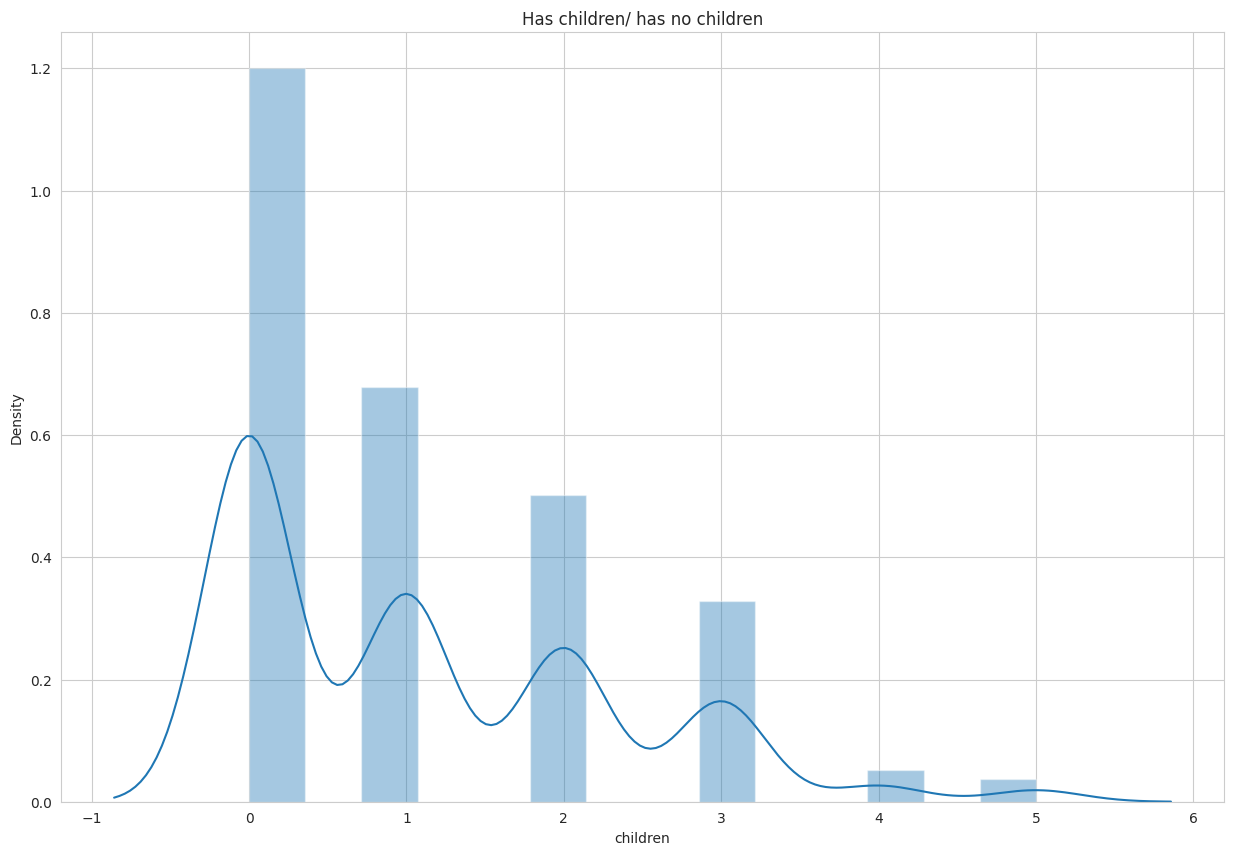

In [ ]:
# Checking for the distribution of patients with children

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.children)
plt.title('Has children/ has no children')
plt.show()

In [ ]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Categorical plots

In [ ]:
# Making a function for count plots and scatter plots for Categorical features

def Categorical_plot(column):

    plt.figure(figsize=(20, 5)) # make figure
    plt.subplot(1,2,1)
    pd.value_counts(data[column]).plot(kind='bar')
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.ylabel("Count\n", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Count\n", fontsize = 15)

    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"{str(column)} - Age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)

    plt.show()
    print()



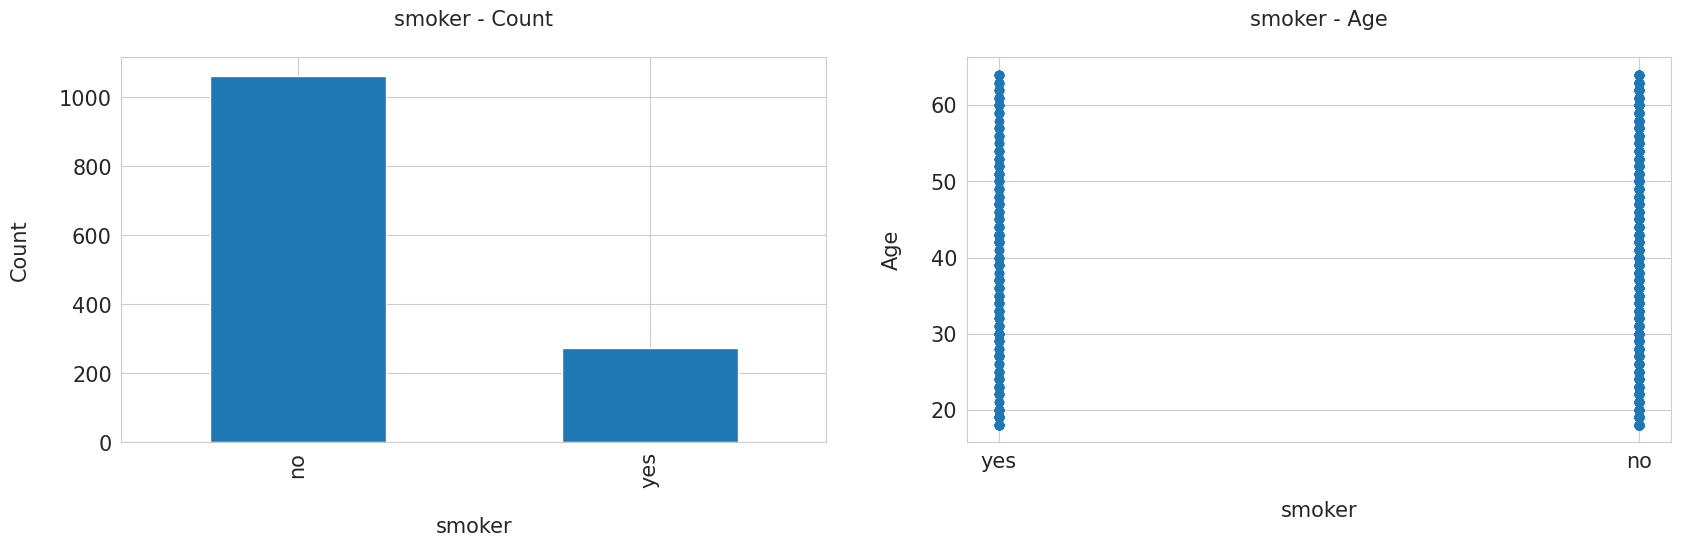

In [ ]:
# Calling the created function for 'smoker'

Categorical_plot("smoker")

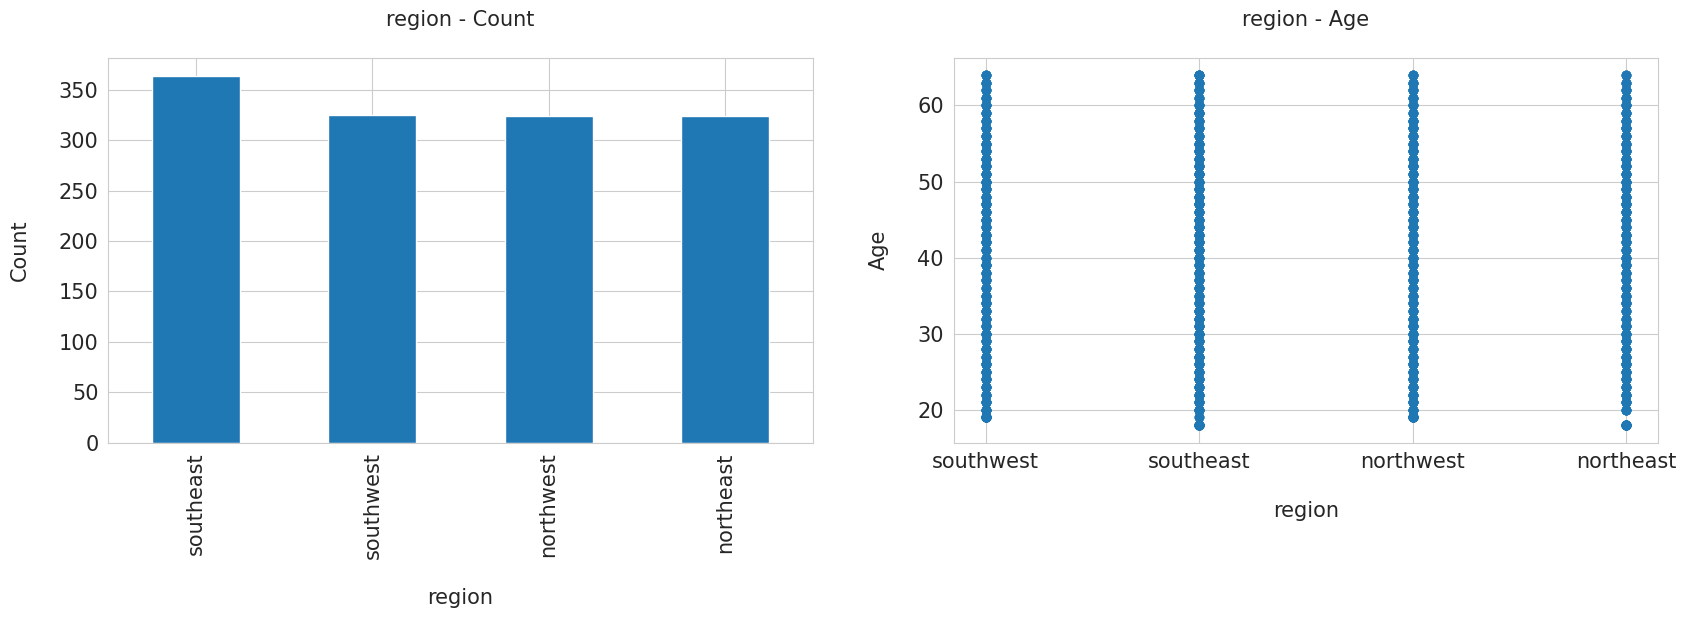

In [ ]:
# Calling the created function for 'region'

Categorical_plot("region")

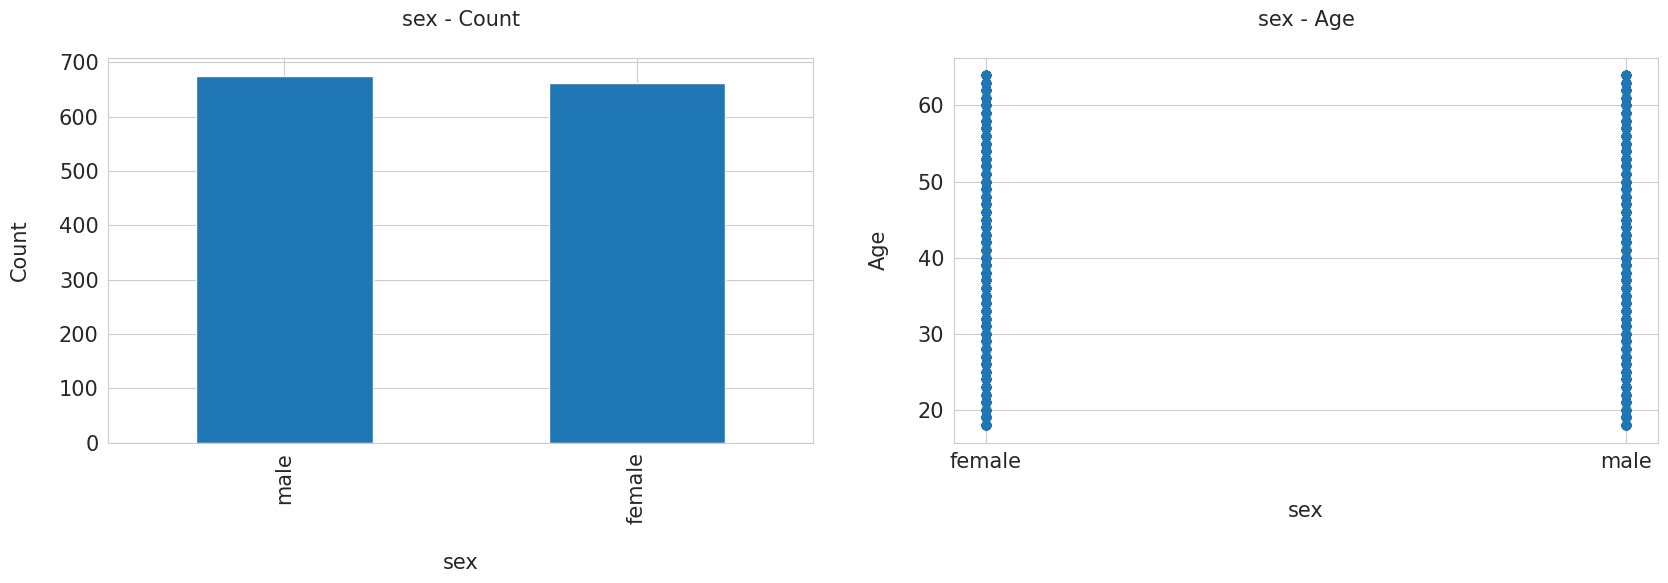

In [ ]:
# Calling the created function for 'sex'

Categorical_plot("sex")

#### Numerical plots

In [ ]:
# make function for box plots and scatter plots for Numerical features

def Numerical_plot(column):

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.boxplot(data[column])
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)

    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} - age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    plt.show()
    print()



#### Checking for outliers

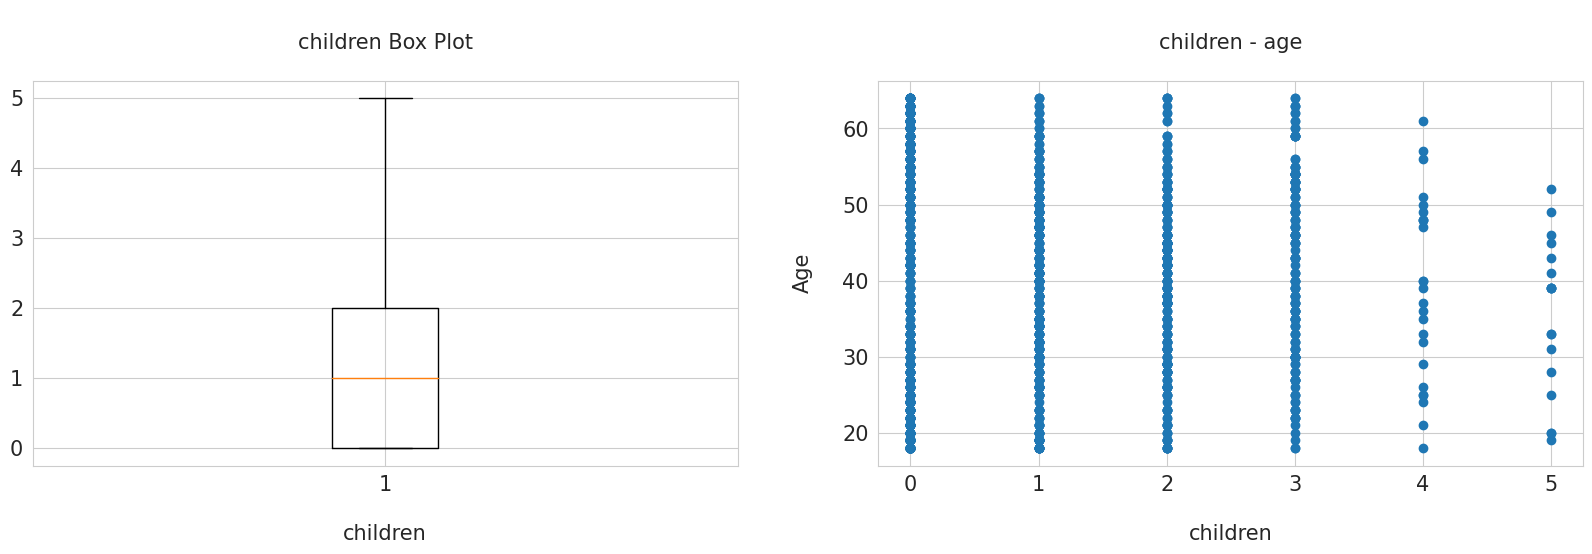

In [ ]:
# # Call the numerical function for 'children'

Numerical_plot("children")

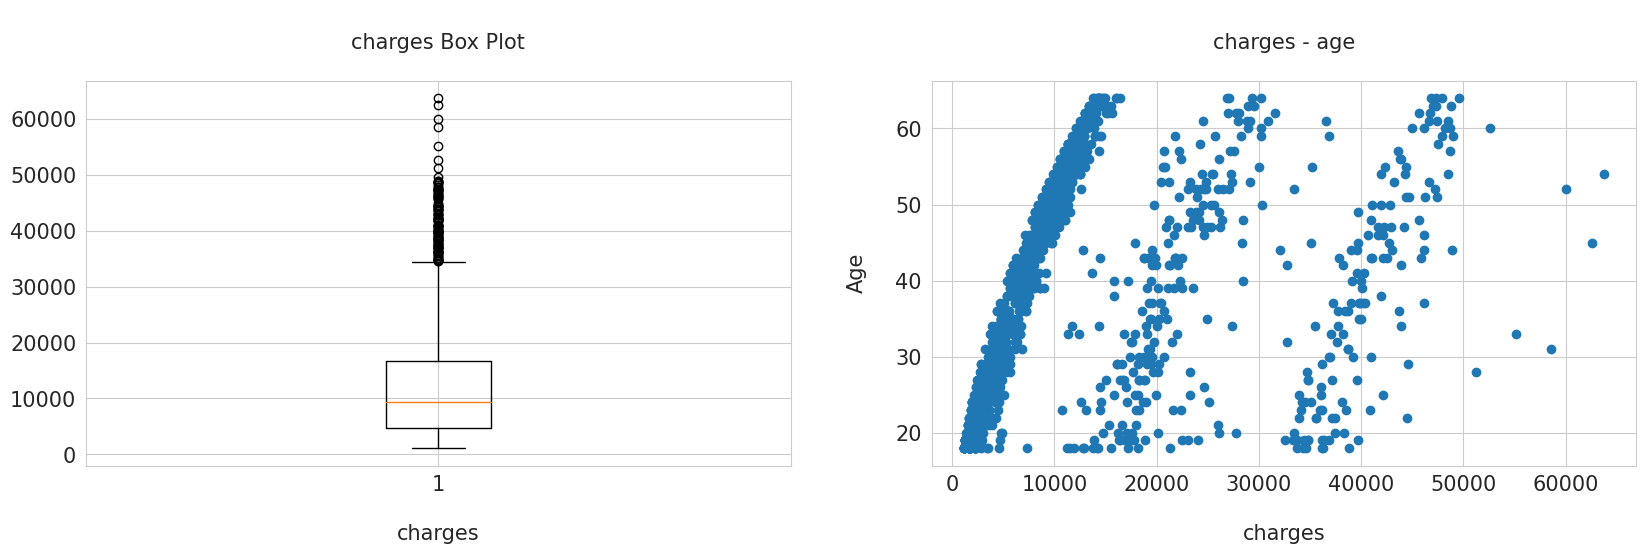

In [ ]:
# Call the numerical function for 'charges'

Numerical_plot("charges")

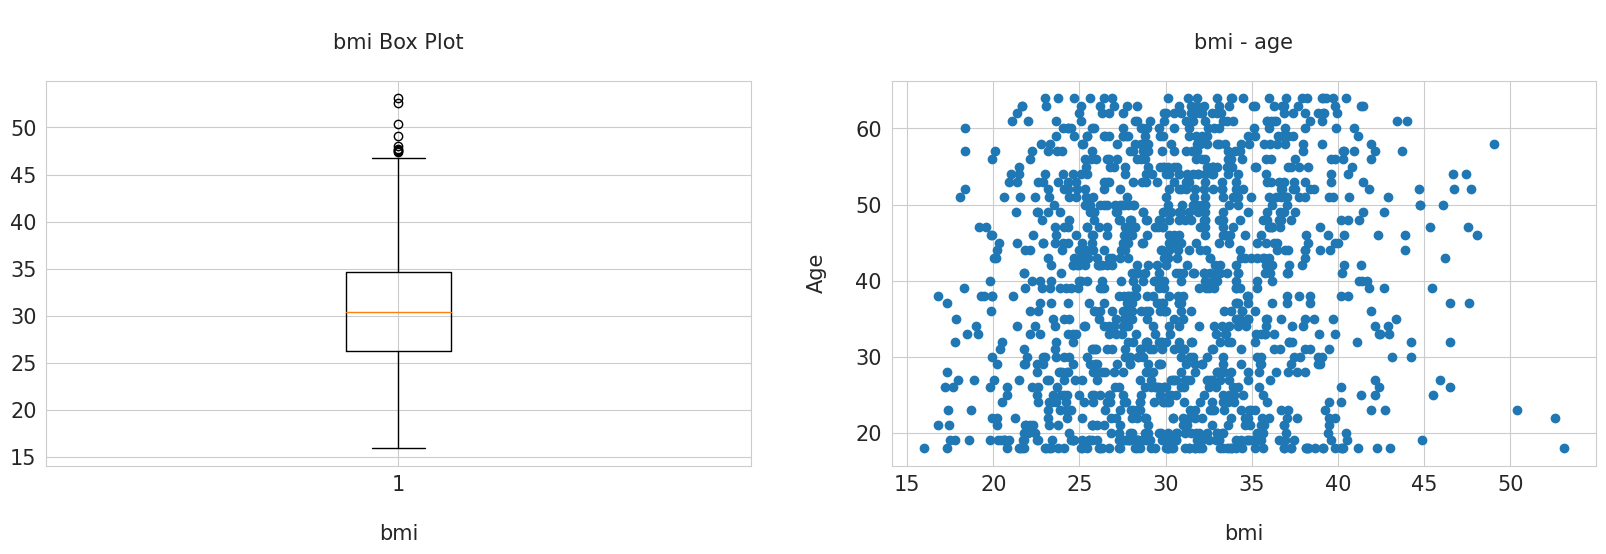

In [ ]:
# Call the numerical function for 'bmi'

Numerical_plot("bmi")

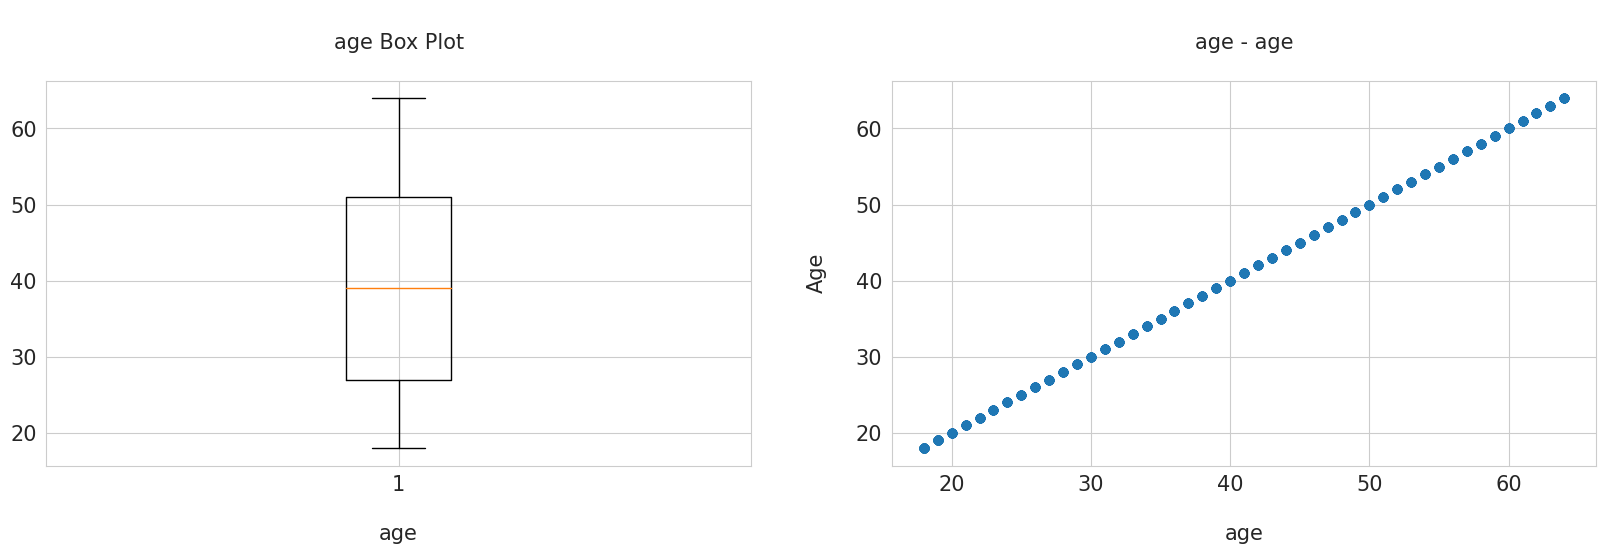

In [ ]:
# Call the numerical function for 'age'

Numerical_plot("age")

### Bivariate Analysis

In [ ]:
# Getting information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# creating a variable for all numerical columns in our data

numeric = data.select_dtypes(["int64", "float64"])
numeric[:5]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Figure size 1500x1000 with 0 Axes>

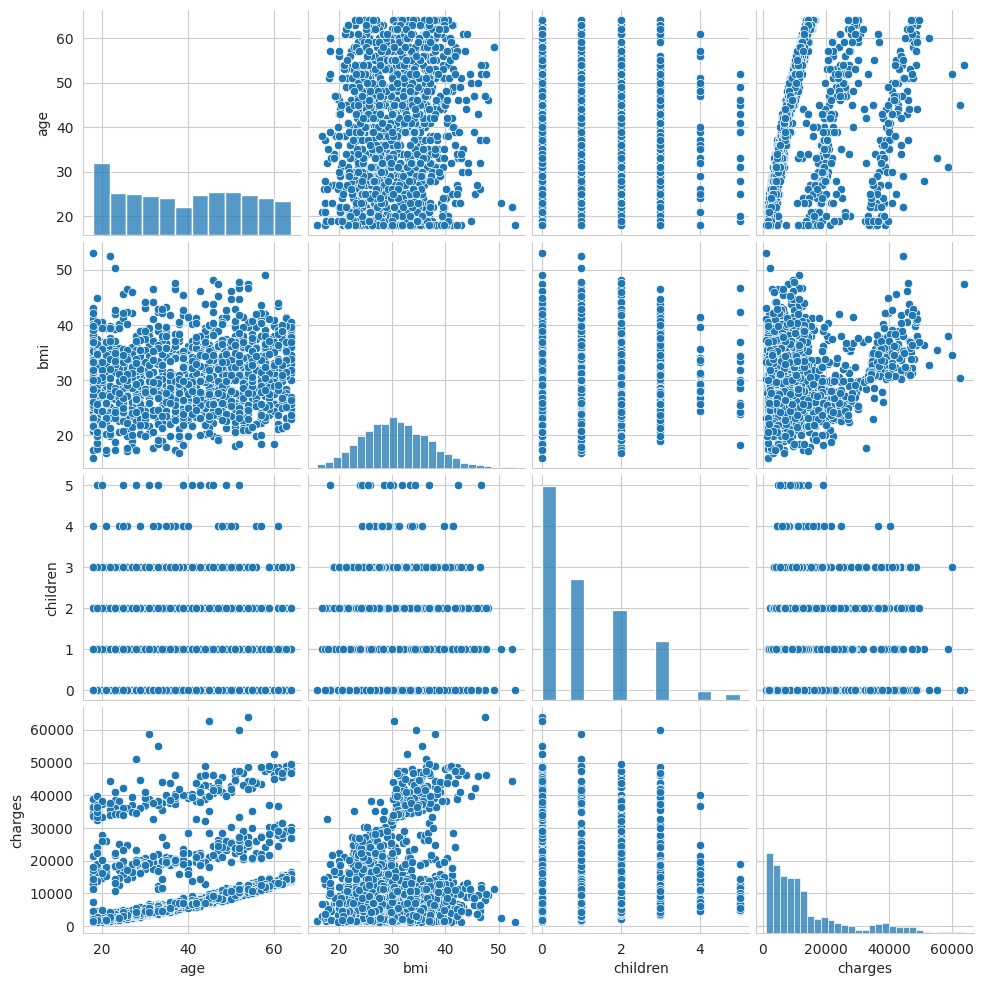

In [ ]:
# Creating pairplots for the numerical columns

plt.figure(figsize=(15, 10))
sns.pairplot(numeric)
plt.show()

In [ ]:
# Showing data correlation

numeric.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


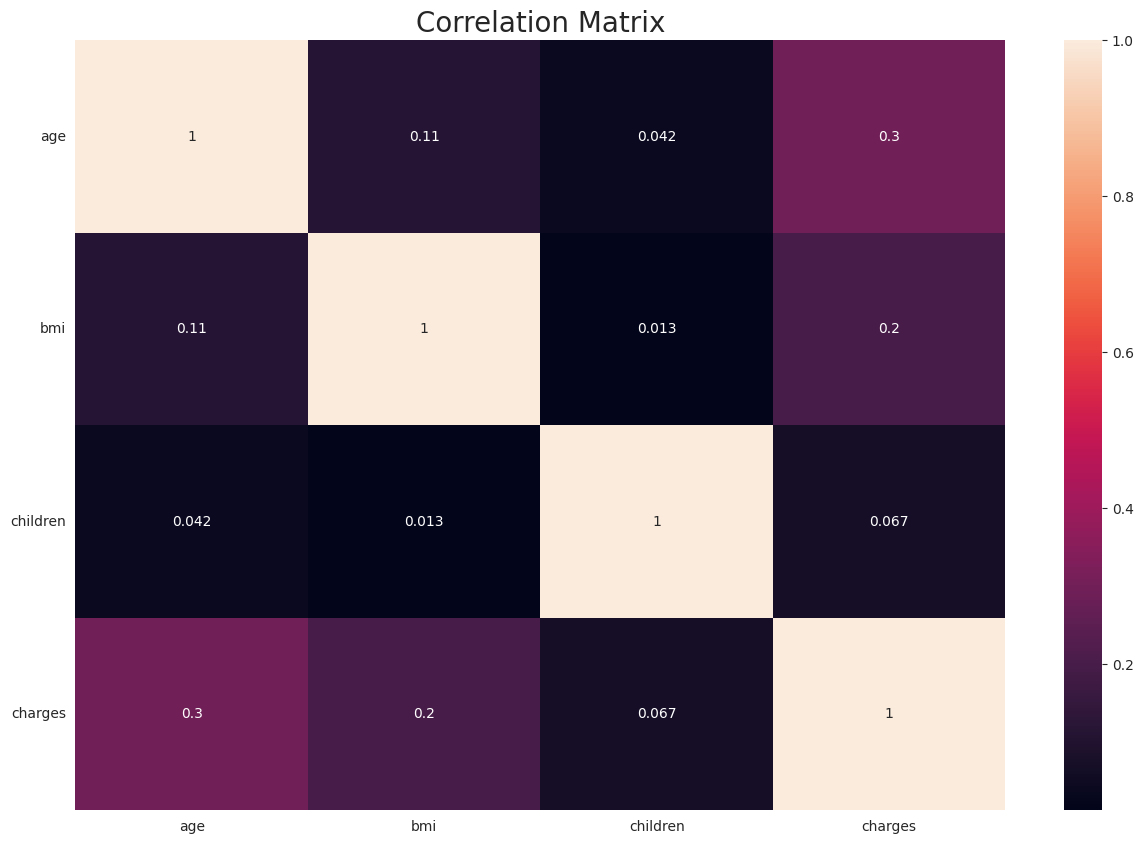

In [ ]:
# Drawing the heat map for the correlation

plt.figure(figsize=(15, 10))
sns.heatmap(numeric.corr(), annot=True)
plt.title('Correlation Matrix', size = 20)
plt.yticks(rotation = 0)
plt.show()

#### Changing categorical features into numerical features

In [ ]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
# Checking for unique values from categorical columns

print("Sex = ", data.sex.unique(), "\n")
print("Smoker = ", data.smoker.unique(), "\n")
print("Region  = ", data.region.unique(), "\n")


Sex =  ['female' 'male'] 

Smoker =  ['yes' 'no'] 

Region  =  ['southwest' 'southeast' 'northwest' 'northeast'] 



In [ ]:
# Showing the value counts in 'region

data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
# showing the value counts in 'sex'

data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
# Showing the value counts in 'smoker'

data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
# Changing categorical features to numerical

data["region"].replace({'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4}, inplace=True)
data["sex"].replace({'male':0, 'female':1}, inplace=True)
data["smoker"].replace({'no':0, 'yes':1}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [ ]:
# Checking the feature changes made

print("Region = ", pd.unique(data["region"]), "\n")
print("Sex = ", pd.unique(data["sex"]), "\n")
print("Smoker = ", pd.unique(data["smoker"]), "\n")



Region =  [2 1 4 3] 

Sex =  [1 0] 

Smoker =  [1 0] 



In [ ]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,2.454749,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.130521,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


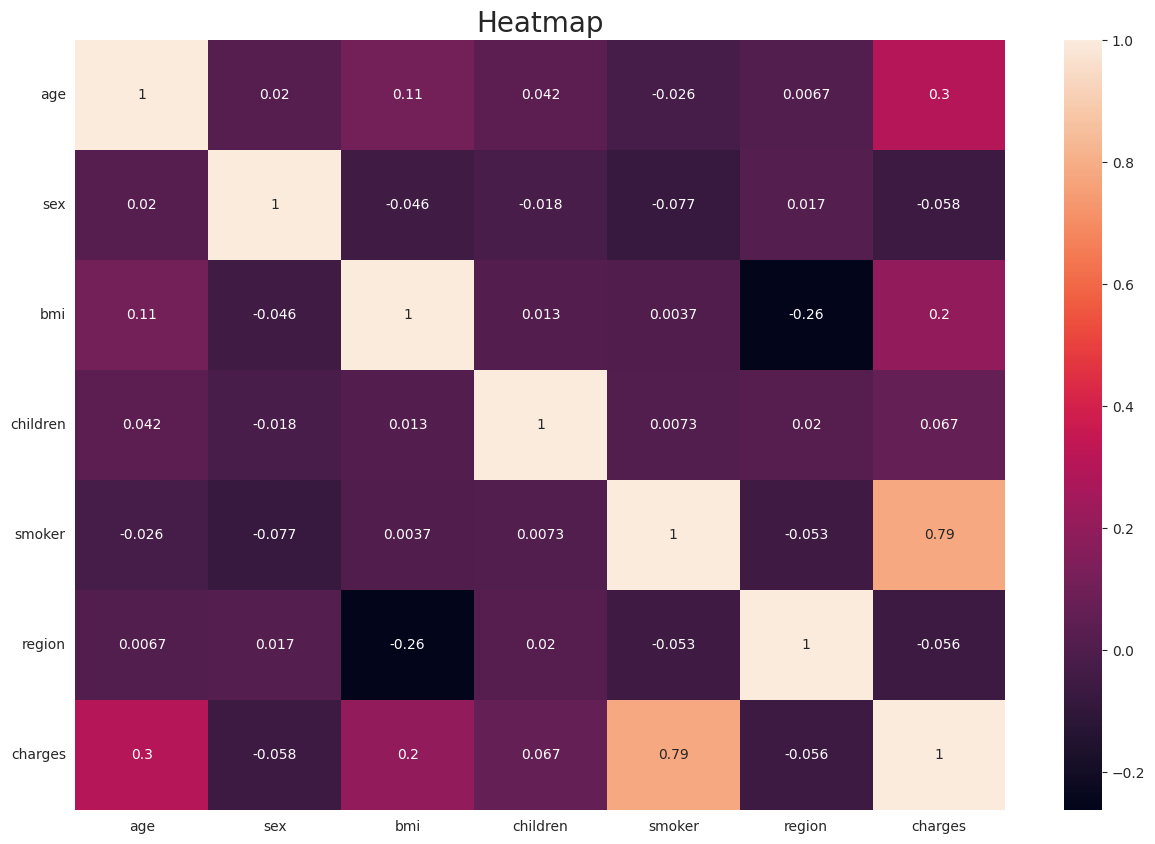

In [ ]:
# Using the heatmap to show correlation for all features

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.yticks(rotation = 0)
plt.title("Heatmap", size = 20)
plt.show()

## Data modelling

Models to consider:
>>
* Random Forest
>>
* KNeighbors

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


In [ ]:
# X - Independent variable -> features variables
# Y - Dependent variable(predicted variable) -> target variable

x = pd.DataFrame(data, columns = ['age', 'bmi', 'sex', 'children', 'region', 'smoker'])
y = data['charges'].values.reshape(-1, 1)

In [128]:
# X -  80% of the data points -> Training the model
# Y - 20% of the data -> Testing the model

# splitting test and train data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 43)

X_train[:5]

,age,bmi,sex,children,region,smoker
144,30,28.69,0,3,4,1
563,50,44.77,0,1,1,0
1057,45,31.79,1,0,1,0
487,19,28.70,0,0,2,0
857,25,24.13,0,0,4,1


In [129]:
# Standardize the data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train[:5]

array([[0.71731834, 0.68599544, 0.        , 0.07173183, 0.09564245,
        0.02391061],
       [0.74483042, 0.66692116, 0.        , 0.01489661, 0.01489661,
        0.        ],
       [0.81648259, 0.57679959, 0.01814406, 0.        , 0.01814406,
        0.        ],
       [0.5510859 , 0.83242975, 0.        , 0.        , 0.05800904,
        0.        ],
       [0.71450246, 0.68963777, 0.        , 0.        , 0.11432039,
        0.0285801 ]])

### Linear Regression

In [130]:
# Initialize model
model = LinearRegression()
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [131]:
# Predicting the test data

Y_pred = model.predict(X_test)

In [132]:
model.intercept_

array([28740.89372054])

In [133]:
model.coef_

array([[ -3294.01864186, -20047.59016449, -81721.87774658,
          9641.20267797, -79168.69095264, 992359.46930387]])

#### Model evaluation

In [134]:
# Evaluations

# Mean Absolute Error
print("Mean absolute error = ", metrics.mean_absolute_error(Y_test, Y_pred))

# Mean Squared Error
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred))

# Root Mean Squared Error
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# R2 score
print("R2 score : ", metrics.r2_score(Y_test, Y_pred))


Mean absolute error =  5358.699664482749
Mean squared error :  60600479.12677296
Root mean squared error :  7784.630956363504
R2 score :  0.5730628986586889


In [135]:
# Mean absolute error =  4077.28218440879
# Mean squared error :  36134607.85297905
# Root mean squared error :  6011.206854948435
# R2 score :  0.7330530469830809

### Decision Trees

In [146]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state = 42)

rf.fit(X_train, Y_train)


<ipython-input-146-52c708835779>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [147]:
rf_pred = rf.predict(X_test)
rf_pred[:5]

array([4299.58247258, 8239.00212059, 3427.45612858, 3184.21014565,
       7637.03373815])

#### RF Model evaluation

In [148]:
# Evaluations

# Mean Absolute Error
print("Mean absolute error = ", metrics.mean_absolute_error(Y_test, rf_pred))

# Mean Squared Error
print("Mean squared error : ", metrics.mean_squared_error(Y_test, rf_pred))

# Root Mean Squared Error
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))

# R2 score
print("R2 score : ", metrics.r2_score(Y_test, rf_pred))


Mean absolute error =  3142.5840218733647
Mean squared error :  26841373.52381331
Root mean squared error :  5180.866097846316
R2 score :  0.8108995444688903


### KNeighbors

MOdel Evaluation

>>
Precision
>>
Recall
>>
